 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
path_whale_returns = Path("Resources/whale_returns.csv")
data_whale_returns = pd.read_csv(path_whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
data_whale_returns.sort_index(inplace=True)
data_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
data_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
df_whale_returns = data_whale_returns.dropna().copy()
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Sample whale returns data frame
df_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
path_algo_returns = Path("Resources/algo_returns.csv")
data_algo_returns = pd.read_csv(path_algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
data_algo_returns.sort_index(inplace=True)
data_algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
data_algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
df_algo_returns = data_algo_returns.dropna()
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
# Sample algorithmic returns data frame
df_algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
path_sp500_history = Path("Resources/sp500_history.csv")
data_sp500_history = pd.read_csv(path_sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
data_sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types
data_sp500_history.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
# Clean identified numeric fields with $ symbol
data_sp500_history["Close"] = data_sp500_history["Close"].str.replace("$", "")
# Convert `Close` from `object` to `float`
data_sp500_history["Close"] = data_sp500_history["Close"].astype("float")
# Check Data Types
data_sp500_history.dtypes

C:\Users\Artur\AppData\Local\Temp\ipykernel_31120\2234823763.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_sp500_history["Close"] = data_sp500_history["Close"].str.replace("$", "")


Close    float64
dtype: object

In [13]:
# Sort the index
data_sp500_history.sort_index(inplace=True)
# Calculate Daily Returns
data_sp500_history = data_sp500_history.pct_change()
data_sp500_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
df_sp500_history = data_sp500_history.dropna().copy()
# Count nulls
df_sp500_history.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
# Rewrite the column names
columns_sp500_history = ["S&P500"]
df_sp500_history.columns = columns_sp500_history
df_sp500_history.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([df_whale_returns, df_algo_returns, df_sp500_history], axis="columns", join="inner")
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

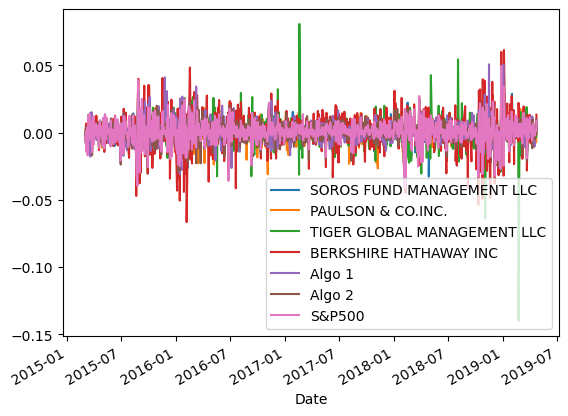

In [17]:
# Plot daily returns of all portfolios
all_portfolios.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

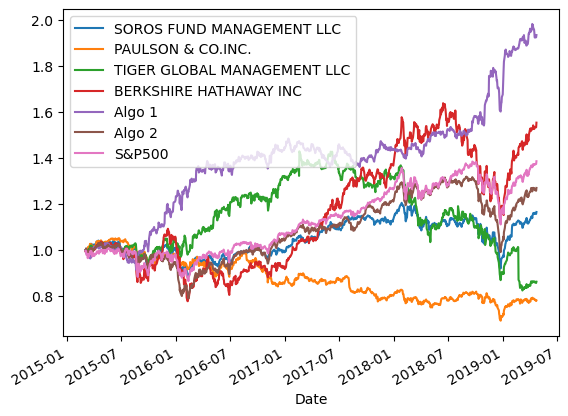

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

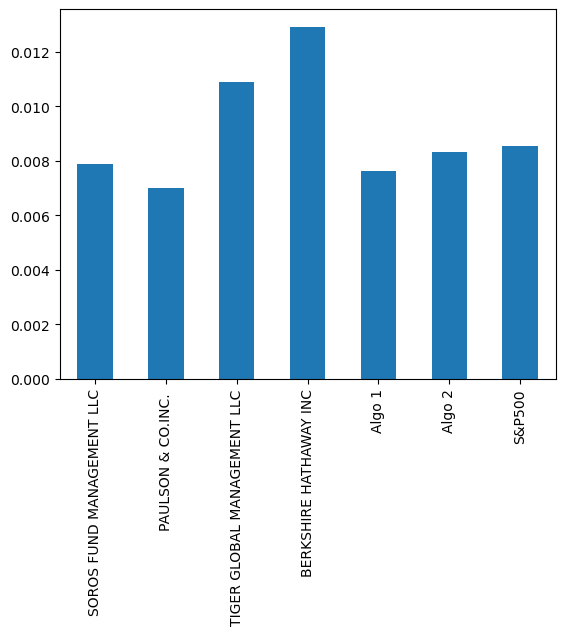

In [19]:
# Box plot to visually show risk
all_portfolios.std().plot.bar()

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_portfolios.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
std_sp500_historical = df_sp500_history.std
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
std_sp500_historical

<bound method NDFrame._add_numeric_operations.<locals>.std of               S&P500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1648 rows x 1 columns]>

In [22]:
### Berkshire Hathaway INC and Tiger Global Management LLC both have standard deviations greater than the S&P 500 implying they are riskier portfolios

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std = annualized_std.sort_values(ascending=False)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

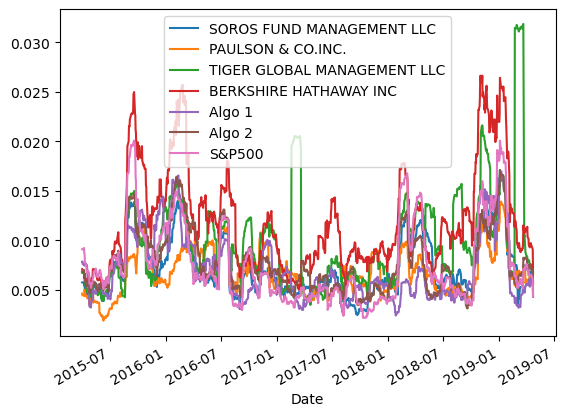

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
three_week_rolling_std=all_portfolios.rolling(window=21).std()
# Plot the rolling standard deviation
three_week_rolling_std.plot()

### Calculate and plot the correlation

<Axes: >

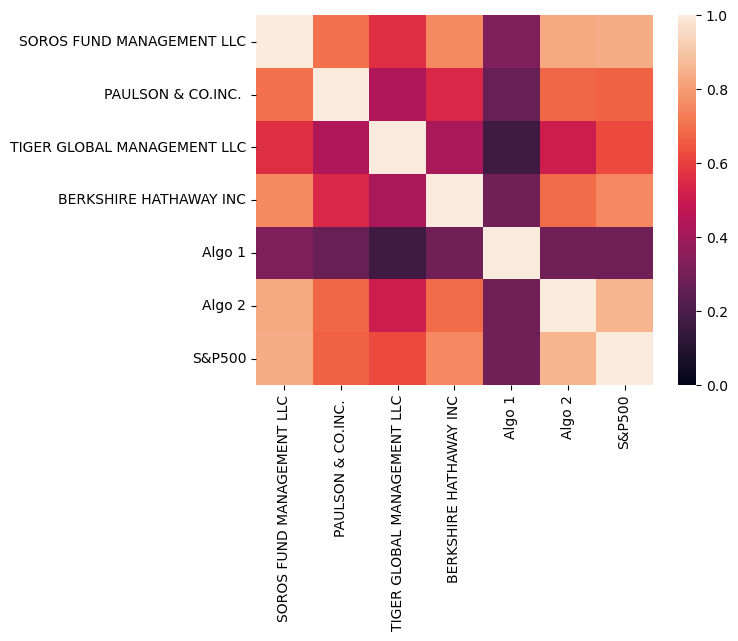

In [25]:
# Calculate the correlation
all_portfolios_correlation = all_portfolios.corr()
# Display de correlation matrix
sns.heatmap(all_portfolios_correlation, vmin=0, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

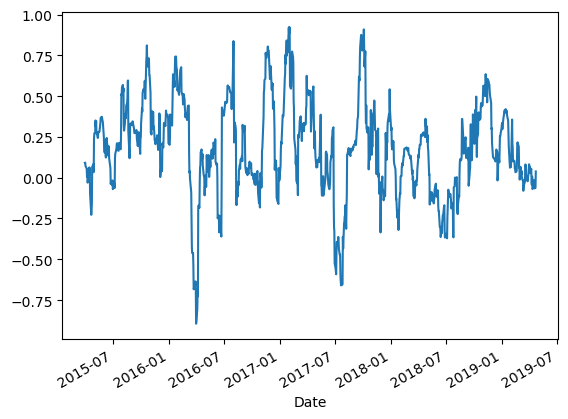

In [26]:
# Calculate covariance of a single portfolio
cov_algo1 = all_portfolios['Algo 1'].cov(all_portfolios['S&P500'])
# Calculate variance of S&P 500
var_sp500 = all_portfolios['S&P500'].var()
# Computing beta
beta_algo1 = cov_algo1 / var_sp500
# Plot beta trend
# Calculate 21-day rolling covariance of Algo 1 vs. S&P 500 and plot the data
rol_cov_algo1 = all_portfolios['Algo 1'].rolling(window=21).cov(all_portfolios['S&P500'])
# Calculate 21-day rolling variance of Algo 1 vs. S&P 500 and plot the data
rol_var_sp500 = all_portfolios['S&P500'].rolling(window=21).var()
# Calculate 21-day rolling beta of Algo 1 and plot the data
rol_beta_algo1 = rol_cov_algo1 / rol_var_sp500
rol_beta_algo1.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [27]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
## RISK FREE RATE OF RETURN: pulled from the avg of the 10 yr treasury rate between the yrs 2015-2019
sharpe_ratios = ((all_portfolios.mean()-.02272)) / annualized_std
sharpe_ratios

Algo 1                        -0.182349
Algo 2                        -0.169573
BERKSHIRE HATHAWAY INC        -0.108320
PAULSON & CO.INC.             -0.205708
S&P500                        -0.164749
SOROS FUND MANAGEMENT LLC     -0.179860
TIGER GLOBAL MANAGEMENT LLC   -0.131858
dtype: float64

<Axes: >

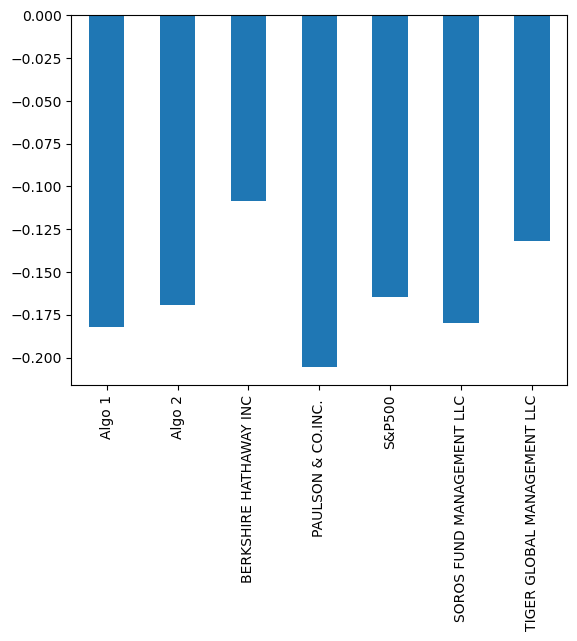

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed both the S&P 500 and the whale portfolios, yet managed to have the second lowest sharpe ratio meaning that the portfolio took on a lot of risk and could have easily performed less.Based off the heatmap, it is likely that algo 1 is a portfolio that is more unrelated to the S&P 500 than the rest.

Algo 2 outperformed the majority of whale portfolios, but underperformed vs the S&P 500 just barely as well as losing to the Berkshire Hathaway portfolio by a considerable margin. It did manage to have the median sharpe ratio just above the S&P 500 and could have easily outperformed the S&P 500.

Overall, Berkshire Hathaway managed to develop a portfolio that bested all portfolios except for algo 1 while maintaining a much better sharpe ratio and would likely be the safer, profitable choice of all the portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data for Apple
path_aapl_historical = Path("Resources/aapl_historical.csv")
df_appl_historical = pd.read_csv(path_aapl_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [31]:
# Reading data for Costco
path_cost_historical = Path("Resources/cost_historical.csv")
df_cost_historical = pd.read_csv(path_cost_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [32]:
# Reading data for Google
path_goog_historical = Path("Resources/goog_historical.csv")
df_goog_historical = pd.read_csv(path_goog_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [33]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([df_cost_historical, df_appl_historical, df_goog_historical], axis="columns", join="inner")
all_stocks

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,AAPL,200.72,GOOG,1162.38
2019-05-08,COST,241.34,AAPL,202.90,GOOG,1166.27
2019-05-07,COST,240.18,AAPL,202.86,GOOG,1174.10
2019-05-06,COST,244.23,AAPL,208.48,GOOG,1189.39
2019-05-03,COST,244.62,AAPL,211.75,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,COST,199.60,AAPL,186.99,GOOG,1078.59
2018-05-16,COST,198.71,AAPL,188.18,GOOG,1081.77
2018-05-15,COST,195.48,AAPL,186.44,GOOG,1079.23


In [34]:
# Reset Date index
all_stocks = all_stocks.sort_index(ascending=True)
all_stocks

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,COST,195.76,AAPL,188.59,GOOG,1098.26
2018-05-14,COST,195.88,AAPL,188.15,GOOG,1100.20
2018-05-15,COST,195.48,AAPL,186.44,GOOG,1079.23
2018-05-16,COST,198.71,AAPL,188.18,GOOG,1081.77
2018-05-17,COST,199.60,AAPL,186.99,GOOG,1078.59
...,...,...,...,...,...,...
2019-05-03,COST,244.62,AAPL,211.75,GOOG,1185.40
2019-05-06,COST,244.23,AAPL,208.48,GOOG,1189.39
2019-05-07,COST,240.18,AAPL,202.86,GOOG,1174.10


In [35]:
# Delete Symbol columns
all_stocks = all_stocks.drop(columns=["Symbol"])

In [36]:
# Reorganize portfolio data by having a column per symbol
all_stocks.columns = ['COST','AAPL','GOOG']
all_stocks

,COST,AAPL,GOOG
Trade DATE,,,
2018-05-11,195.76,188.59,1098.26
2018-05-14,195.88,188.15,1100.20
2018-05-15,195.48,186.44,1079.23
2018-05-16,198.71,188.18,1081.77
2018-05-17,199.60,186.99,1078.59
...,...,...,...
2019-05-03,244.62,211.75,1185.40
2019-05-06,244.23,208.48,1189.39
2019-05-07,240.18,202.86,1174.10


In [37]:
# Calculate daily returns
stock_returns = all_stocks.pct_change()
# Drop NAs
stock_returns = stock_returns.dropna()
# Display sample data
stock_returns

,COST,AAPL,GOOG
Trade DATE,,,
2018-05-14,0.000613,-0.002333,0.001766
2018-05-15,-0.002042,-0.009088,-0.019060
2018-05-16,0.016523,0.009333,0.002354
2018-05-17,0.004479,-0.006324,-0.002940
2018-05-18,-0.003206,-0.003637,-0.011339
...,...,...,...
2019-05-03,0.007953,0.012431,0.019602
2019-05-06,-0.001594,-0.015443,0.003366
2019-05-07,-0.016583,-0.026957,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = stock_returns.dot(weights)
# Display sample data
portfolio_returns

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat([all_portfolios, portfolio_returns], axis="columns", join="inner")

In [40]:
# Rename columns to reflect additional column
columns = 'SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','S&P500','Custom Portfolio'
portfolio_returns.columns = columns
portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [41]:
#Drop top row due to missing values
portfolio_returns = portfolio_returns.drop('2018-05-14')
portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom Portfolio
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387,0.007600
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns = portfolio_returns.dropna()
portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom Portfolio
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387,0.007600
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
std_portfolio_returns = portfolio_returns.std
# Lowered 252 Trading days to 236 to account for cleaned data
annualized_std = portfolio_returns * np.sqrt(236)
annualized_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom Portfolio
2018-05-15,-0.011151,-0.021643,-0.048998,-0.224380,-0.017433,-0.017495,-0.105111,-0.154600
2018-05-16,0.132688,0.095928,0.084178,0.066211,-0.035740,0.051323,0.062379,0.144455
2018-05-17,-0.030041,0.038773,-0.096278,-0.078959,-0.106757,0.079959,-0.013148,-0.024500
2018-05-18,-0.066939,-0.041055,-0.197127,-0.033980,0.039287,-0.038350,-0.040437,-0.093105
2018-05-21,0.038458,-0.018362,-0.017712,0.159306,-0.047505,0.075642,0.113477,0.116751
...,...,...,...,...,...,...,...,...
2019-04-16,0.041469,0.005963,-0.012765,0.012854,-0.106686,0.044542,0.007825,0.005221
2019-04-17,-0.044501,-0.099350,-0.067740,0.049500,-0.158247,-0.080316,-0.034930,0.142742
2019-04-18,0.022243,0.018770,0.008934,0.029435,-0.009032,-0.018883,0.024258,0.023740
2019-04-22,-0.039723,-0.112646,-0.055922,-0.016711,0.010394,-0.029737,0.015547,0.018689


### Calculate and plot rolling `std` with 21-day window

<Axes: >

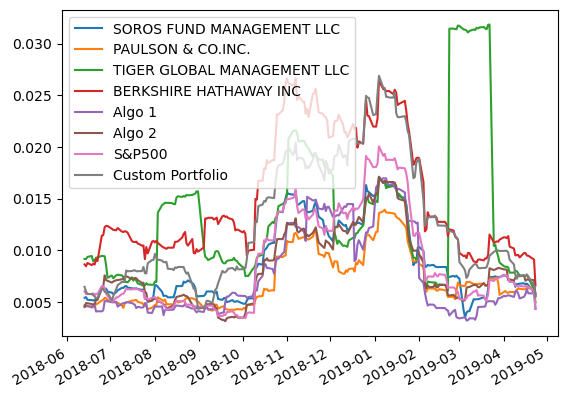

In [44]:
# Calculate rolling standard deviation
rolling_std_pr = portfolio_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_pr.plot()

### Calculate and plot the correlation

<Axes: >

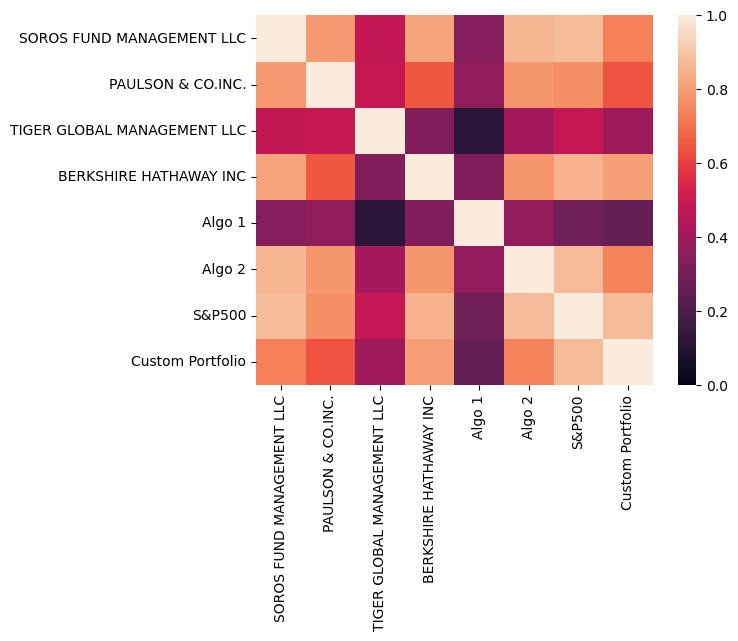

In [45]:
# Calculate and plot the correlation
portfolio_returns_correlation = portfolio_returns.corr()
sns.heatmap(portfolio_returns_correlation, vmin=0, vmax=1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: >

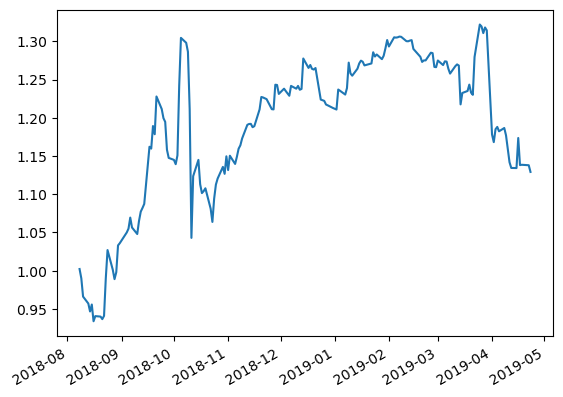

In [46]:
# Calculate and plot Beta
# Calculate 60-day rolling covariance of Algo 1 vs. S&P 500 and plot the data
rol_cov_custom_portfolio = portfolio_returns['Custom Portfolio'].rolling(window=60).cov(portfolio_returns['S&P500'])
# Calculate 21-day rolling variance of Algo 1 vs. S&P 500 and plot the data
rol60_var_sp500 = all_portfolios['S&P500'].rolling(window=60).var()
# Calculate 21-day rolling beta of Algo 1 and plot the data
rol_beta_custom_portfolio = rol_cov_custom_portfolio / rol60_var_sp500
rol_beta_custom_portfolio.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_portfolio_returns = (portfolio_returns.mean()-.02525) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios_portfolio_returns

SOROS FUND MANAGEMENT LLC     -0.170071
PAULSON & CO.INC.             -0.214820
TIGER GLOBAL MANAGEMENT LLC   -0.112471
BERKSHIRE HATHAWAY INC        -0.101311
Algo 1                        -0.180384
Algo 2                        -0.180288
S&P500                        -0.163407
Custom Portfolio              -0.115425
dtype: float64

<Axes: >

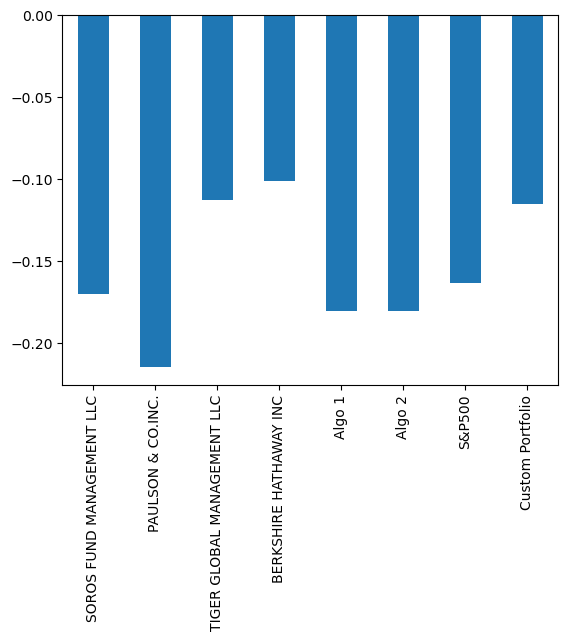

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_portfolio_returns.plot(kind='bar')

### How does your portfolio do?

My Portfolio definitely is on the better side in terms of the sharpe ratio, however, it's beta is typically above 1 meaning that the portfolio is taking on additional risk. In terms of the rolling std, the custom portfolio is very "middle of the road" when compared to the other portfolios. Overall performance of the stock on the stock market was considerably volatile however, final returns across the period was 8.3% growth.